# FlowerGarden task generation

In [1]:
# General importations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import string
from random import shuffle,seed,choices
from faker import Faker
from faker.providers.person.en import Provider
import networkx as nx
import itertools

from utils import Utils
from flower_garden import FlowerGarden
from dataset_generator import DataSetGenerator

In [2]:
u = Utils()
dg = DataSetGenerator()

## Error test (low complexity)

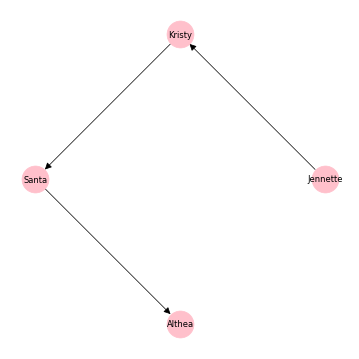


Causal context: A group of friends is planting a bed of flowers from seed, but the seed packets are not labeled. Jennette will be happy if the flowers she planted are pink. Kristy will be happy if the flowers she planted are yellow and Jennette is happy. Santa will be happy if the flowers she planted are purple or if Kristy is happy. Althea will be happy if the flowers she planted are red and Santa is happy. 

Sample context:  Once the flowers bloom, Jennette's flowers are salmon pink, Kristy's flowers are canary yellow, Santa's flowers are eggplant purple, and Althea's flowers are amethyst purple.

- Global cause-effect pairs: ('Jennette', 'Althea')
- Local cause-effect pairs: [('Jennette', 'Kristy'), ('Jennette', 'Santa'), ('Kristy', 'Santa'), ('Kristy', 'Althea'), ('Santa', 'Althea')]
- Compositions: [[('Jennette', 'Kristy'), ('Kristy', 'Santa'), ('Santa', 'Althea')], [('Jennette', 'Kristy'), ('Kristy', 'Althea')], [('Jennette', 'Santa'), ('Santa', 'Althea')]]
- Causal functions: [

In [3]:
size = [2,2,2]
tg = FlowerGarden(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
print("- Causal functions:", tg.causal_functions)

In [4]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())


- Factual queries:


{'Althea': {'Prompt': 'Is Althea happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Jennette': 1, 'Kristy': 1, 'Santa': 1, 'Althea': 0},
  'True exogenous': {'FTMT': 1, 'QEZX': 1, '5GNU': 1, 'ULPT': 0},
  'True response': 0},
 'Kristy': {'Prompt': 'Is Kristy happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Jennette': 1, 'Kristy': 1, 'Santa': 1, 'Althea': 0},
  'True exogenous': {'FTMT': 1, 'QEZX': 1, '5GNU': 1, 'ULPT': 0},
  'True response': 1},
 'Santa': {'Prompt': 'Is Santa happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Jennette': 1, 'Kristy': 1, 'Santa': 1, 'Althea': 0},
  'True exogenous': {'FTMT': 1, 'QEZX': 1, '5GNU': 1, 'ULPT': 0},
  'True response': 1}}

In [5]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = True):

-----------------------

-- ('Jennette', 'Althea') --
Prompt: Now, suppose that Jennette is happy regardless of all other circumstances. With this new assumption, is Althea happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Jennette': 1, 'Kristy': 1, 'Santa': 1, 'Althea': 0}
True exogenous: {'FTMT': 1, 'QEZX': 1, '5GNU': 1, 'ULPT': 0}
True response: 0

-----------------------

-- ('Jennette', 'Kristy') --
Prompt: Now, suppose that Jennette is happy regardless of all other circumstances. With this new assumption, is Kristy happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Jennette': 1, 'Kristy': 1, 'Santa': 1, 'Althea': 0}
True exogenous: {'FTMT': 1, 'QEZX': 1, '5GNU': 1, 'ULPT': 0}
True response: 1

-----------------------

-- ('Jennette', 'Santa') --
Prompt: Now, suppose that Jennette is happy regardless of all other circumstances. With this new assumption, is S

In [6]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = False):

-----------------------

-- ('Jennette', 'Althea') --
Prompt: Now, suppose that Jennette is not happy regardless of all other circumstances. With this new assumption, is Althea happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Jennette': 0, 'Kristy': 0, 'Santa': 1, 'Althea': 0}
True exogenous: {'FTMT': 1, 'QEZX': 1, '5GNU': 1, 'ULPT': 0}
True response: 0

-----------------------

-- ('Jennette', 'Kristy') --
Prompt: Now, suppose that Jennette is not happy regardless of all other circumstances. With this new assumption, is Kristy happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Jennette': 0, 'Kristy': 0, 'Santa': 1, 'Althea': 0}
True exogenous: {'FTMT': 1, 'QEZX': 1, '5GNU': 1, 'ULPT': 0}
True response: 0

-----------------------

-- ('Jennette', 'Santa') --
Prompt: Now, suppose that Jennette is not happy regardless of all other circumstances. With this new ass

In [7]:
# Test observational data generation.
df_obs, df_noise = tg.sample_scm(n = 5,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

,Jennette,Kristy,Santa,Althea
0,1,1,1,1
1,0,0,1,0
2,1,0,1,0
3,1,1,1,1
4,1,1,1,1


,FTMT,QEZX,5GNU,ULPT
0,1,1,0,1
1,0,0,1,0
2,1,0,1,0
3,1,1,1,1
4,1,1,1,1


In [8]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 1
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Santa = 1 --


,Jennette,Kristy,Santa,Althea
0,1,1,1,1
1,0,0,1,0
2,1,0,1,0
3,1,1,1,1
4,1,1,1,1


,FTMT,QEZX,5GNU,ULPT
0,1,1,0,1
1,0,0,1,0
2,1,0,1,0
3,1,1,1,1
4,1,1,1,1



-- Jennette = 1 --


,Jennette,Kristy,Santa,Althea
0,1,1,1,1
1,1,0,1,0
2,1,0,1,0
3,1,1,1,1
4,1,1,1,1


,FTMT,QEZX,5GNU,ULPT
0,1,1,0,1
1,0,0,1,0
2,1,0,1,0
3,1,1,1,1
4,1,1,1,1



-- Kristy = 1 --


,Jennette,Kristy,Santa,Althea
0,1,1,1,1
1,0,1,1,0
2,1,1,1,0
3,1,1,1,1
4,1,1,1,1


,FTMT,QEZX,5GNU,ULPT
0,1,1,0,1
1,0,0,1,0
2,1,0,1,0
3,1,1,1,1
4,1,1,1,1


In [9]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 0
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Santa = 0 --


,Jennette,Kristy,Santa,Althea
0,1,1,0,0
1,0,0,0,0
2,1,0,0,0
3,1,1,0,0
4,1,1,0,0


,FTMT,QEZX,5GNU,ULPT
0,1,1,0,1
1,0,0,1,0
2,1,0,1,0
3,1,1,1,1
4,1,1,1,1



-- Jennette = 0 --


,Jennette,Kristy,Santa,Althea
0,0,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,1
4,0,0,1,1


,FTMT,QEZX,5GNU,ULPT
0,1,1,0,1
1,0,0,1,0
2,1,0,1,0
3,1,1,1,1
4,1,1,1,1



-- Kristy = 0 --


,Jennette,Kristy,Santa,Althea
0,1,0,0,0
1,0,0,1,0
2,1,0,1,0
3,1,0,1,1
4,1,0,1,1


,FTMT,QEZX,5GNU,ULPT
0,1,1,0,1
1,0,0,1,0
2,1,0,1,0
3,1,1,1,1
4,1,1,1,1


## Error test (moderate complexity)

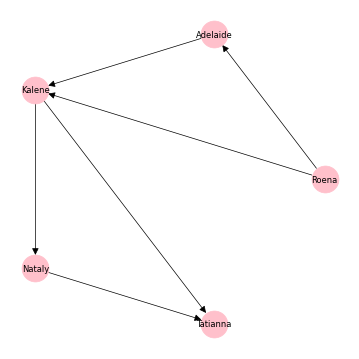


Causal context: A group of friends is planting a bed of flowers from seed, but the seed packets are not labeled. Roena will be happy if the flowers she planted are pink. Adelaide will be happy if the flowers she planted are red and Roena is happy. Kalene will be happy if the flowers she planted are purple or if Roena is happy or if Adelaide is happy. Nataly will be happy if the flowers she planted are purple or if Kalene is happy. Tatianna will be happy if the flowers she planted are yellow and Kalene is happy and Nataly is happy. 

Sample context:  Once the flowers bloom, Roena's flowers are bubblegum pink, Adelaide's flowers are brick red, Kalene's flowers are lilac purple, Nataly's flowers are eggplant purple, and Tatianna's flowers are brick red.

- Global cause-effect pairs: ('Roena', 'Tatianna')
- Local cause-effect pairs: [('Roena', 'Kalene'), ('Kalene', 'Tatianna')]
- Compositions: [[('Roena', 'Kalene'), ('Kalene', 'Tatianna')]]
- Causal functions: ['or', 'and', 'or', 'or', 'a

In [10]:
size = [3,3]
tg = FlowerGarden(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
print("- Causal functions:", tg.causal_functions)

In [11]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())


- Factual queries:


{'Tatianna': {'Prompt': 'Is Tatianna happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Roena': 1,
   'Adelaide': 1,
   'Kalene': 1,
   'Nataly': 1,
   'Tatianna': 0},
  'True exogenous': {'D5MT': 1, '64RS': 1, 'X0GY': 1, 'K47G': 1, 'SJMW': 0},
  'True response': 0},
 'Kalene': {'Prompt': 'Is Kalene happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Roena': 1,
   'Adelaide': 1,
   'Kalene': 1,
   'Nataly': 1,
   'Tatianna': 0},
  'True exogenous': {'D5MT': 1, '64RS': 1, 'X0GY': 1, 'K47G': 1, 'SJMW': 0},
  'True response': 1}}

In [12]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = True):

-----------------------

-- ('Roena', 'Tatianna') --
Prompt: Now, suppose that Roena is happy regardless of all other circumstances. With this new assumption, is Tatianna happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Roena': 1, 'Adelaide': 1, 'Kalene': 1, 'Nataly': 1, 'Tatianna': 0}
True exogenous: {'D5MT': 1, '64RS': 1, 'X0GY': 1, 'K47G': 1, 'SJMW': 0}
True response: 0

-----------------------

-- ('Roena', 'Kalene') --
Prompt: Now, suppose that Roena is happy regardless of all other circumstances. With this new assumption, is Kalene happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Roena': 1, 'Adelaide': 1, 'Kalene': 1, 'Nataly': 1, 'Tatianna': 0}
True exogenous: {'D5MT': 1, '64RS': 1, 'X0GY': 1, 'K47G': 1, 'SJMW': 0}
True response: 1

-----------------------

-- ('Kalene', 'Tatianna') --
Prompt: Now, suppose that Kalene is happy regardless of all other ci

In [13]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = False):

-----------------------

-- ('Roena', 'Tatianna') --
Prompt: Now, suppose that Roena is not happy regardless of all other circumstances. With this new assumption, is Tatianna happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Roena': 0, 'Adelaide': 0, 'Kalene': 1, 'Nataly': 1, 'Tatianna': 0}
True exogenous: {'D5MT': 1, '64RS': 1, 'X0GY': 1, 'K47G': 1, 'SJMW': 0}
True response: 0

-----------------------

-- ('Roena', 'Kalene') --
Prompt: Now, suppose that Roena is not happy regardless of all other circumstances. With this new assumption, is Kalene happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Roena': 0, 'Adelaide': 0, 'Kalene': 1, 'Nataly': 1, 'Tatianna': 0}
True exogenous: {'D5MT': 1, '64RS': 1, 'X0GY': 1, 'K47G': 1, 'SJMW': 0}
True response: 1

-----------------------

-- ('Kalene', 'Tatianna') --
Prompt: Now, suppose that Kalene is not happy regardless of

In [14]:
# Test observational data generation.
df_obs, df_noise = tg.sample_scm(n = 5,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

,Roena,Adelaide,Kalene,Nataly,Tatianna
0,1,1,1,1,1
1,1,0,1,1,1
2,1,1,1,1,0
3,1,1,1,1,1
4,1,1,1,1,1


,D5MT,64RS,X0GY,K47G,SJMW
0,1,1,1,0,1
1,1,0,0,1,1
2,1,1,0,1,0
3,1,1,0,0,1
4,1,1,0,0,1


In [15]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 1
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Kalene = 1 --


,Roena,Adelaide,Kalene,Nataly,Tatianna
0,1,1,1,1,1
1,1,0,1,1,1
2,1,1,1,1,0
3,1,1,1,1,1
4,1,1,1,1,1


,D5MT,64RS,X0GY,K47G,SJMW
0,1,1,1,0,1
1,1,0,0,1,1
2,1,1,0,1,0
3,1,1,0,0,1
4,1,1,0,0,1



-- Roena = 1 --


,Roena,Adelaide,Kalene,Nataly,Tatianna
0,1,1,1,1,1
1,1,0,1,1,1
2,1,1,1,1,0
3,1,1,1,1,1
4,1,1,1,1,1


,D5MT,64RS,X0GY,K47G,SJMW
0,1,1,1,0,1
1,1,0,0,1,1
2,1,1,0,1,0
3,1,1,0,0,1
4,1,1,0,0,1


In [16]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 0
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Kalene = 0 --


,Roena,Adelaide,Kalene,Nataly,Tatianna
0,1,1,0,0,0
1,1,0,0,1,0
2,1,1,0,1,0
3,1,1,0,0,0
4,1,1,0,0,0


,D5MT,64RS,X0GY,K47G,SJMW
0,1,1,1,0,1
1,1,0,0,1,1
2,1,1,0,1,0
3,1,1,0,0,1
4,1,1,0,0,1



-- Roena = 0 --


,Roena,Adelaide,Kalene,Nataly,Tatianna
0,0,0,1,1,1
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,0
4,0,0,0,0,0


,D5MT,64RS,X0GY,K47G,SJMW
0,1,1,1,0,1
1,1,0,0,1,1
2,1,1,0,1,0
3,1,1,0,0,1
4,1,1,0,0,1


In [17]:
glo = [tg.get_global()]
loc = tg.get_local()
comp = tg.get_compositions()

print(glo)
print(loc)
print(comp)

[('Roena', 'Tatianna')]
[('Roena', 'Kalene'), ('Kalene', 'Tatianna')]
[[('Roena', 'Kalene'), ('Kalene', 'Tatianna')]]


In [18]:
# Get PNS and compare to ATE.
results_dict = dict()
for n in [5,10,50,100,500,1000,5000]:
    pair_dict = dict()
    for pair in glo+loc:
        df_cf, df_noise = tg.sample_scm(n = n,
                                        intervene_node = pair[0],
                                        intervene_value = 1)
        df_cf.rename(columns={pair[1]: 'True (cause = True)'}, inplace = True)
        df_cf_0, df_noise = tg.sample_scm(n = n,
                                          intervene_node = pair[0],
                                          intervene_value = 0)
        df_cf["True (cause = False)"] = df_cf_0[pair[1]]
        display(df_cf.head(5))
        print("\n-- {} | n = {} --".format(pair,n))
        pns = dg.get_pns_ate(df_cf)
        pair_dict[pair] = pns
    results_dict[n] = pair_dict

,Roena,Adelaide,Kalene,Nataly,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,0,1,1,1,0
2,1,1,1,1,0,0
3,1,1,1,1,1,0
4,1,1,1,1,1,0



-- ('Roena', 'Tatianna') | n = 5 --
-- PNS = 0.6 | ATE = 0.6000000000000001 --


,Roena,Adelaide,True (cause = True),Nataly,Tatianna,True (cause = False)
0,1,1,1,1,1,1
1,1,0,1,1,1,0
2,1,1,1,1,0,0
3,1,1,1,1,1,0
4,1,1,1,1,1,0



-- ('Roena', 'Kalene') | n = 5 --
-- PNS = 0.8 | ATE = 0.8 --


,Roena,Adelaide,Kalene,Nataly,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,0,1,1,1,0
2,1,1,1,1,0,0
3,1,1,1,1,1,0
4,1,1,1,1,1,0



-- ('Kalene', 'Tatianna') | n = 5 --
-- PNS = 0.8 | ATE = 0.8 --


,Roena,Adelaide,Kalene,Nataly,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,0,1,1,1,1
2,1,1,1,1,1,0
3,1,0,1,1,0,0
4,1,1,1,1,0,0



-- ('Roena', 'Tatianna') | n = 10 --
-- PNS = 0.3 | ATE = 0.3 --


,Roena,Adelaide,True (cause = True),Nataly,Tatianna,True (cause = False)
0,1,1,1,1,1,1
1,1,0,1,1,1,1
2,1,1,1,1,1,0
3,1,0,1,1,0,1
4,1,1,1,1,0,1



-- ('Roena', 'Kalene') | n = 10 --
-- PNS = 0.3 | ATE = 0.30000000000000004 --


,Roena,Adelaide,Kalene,Nataly,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,0,1,1,1,0
2,1,1,1,1,1,0
3,1,0,1,1,0,0
4,1,1,1,1,0,0



-- ('Kalene', 'Tatianna') | n = 10 --
-- PNS = 0.6 | ATE = 0.6 --


,Roena,Adelaide,Kalene,Nataly,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,0,0
2,1,1,1,1,1,0
3,1,0,1,1,1,0
4,1,1,1,1,0,0



-- ('Roena', 'Tatianna') | n = 50 --
-- PNS = 0.22 | ATE = 0.22000000000000003 --


,Roena,Adelaide,True (cause = True),Nataly,Tatianna,True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,0,0
2,1,1,1,1,1,0
3,1,0,1,1,1,0
4,1,1,1,1,0,0



-- ('Roena', 'Kalene') | n = 50 --
-- PNS = 0.48 | ATE = 0.48 --


,Roena,Adelaide,Kalene,Nataly,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,0,0
2,1,1,1,1,1,0
3,1,0,1,1,1,0
4,1,1,1,1,0,0



-- ('Kalene', 'Tatianna') | n = 50 --
-- PNS = 0.54 | ATE = 0.54 --


,Roena,Adelaide,Kalene,Nataly,True (cause = True),True (cause = False)
0,1,1,1,1,0,0
1,1,0,1,1,1,0
2,1,0,1,1,0,0
3,1,0,1,1,1,1
4,1,0,1,1,0,0



-- ('Roena', 'Tatianna') | n = 100 --
-- PNS = 0.23 | ATE = 0.22999999999999998 --


,Roena,Adelaide,True (cause = True),Nataly,Tatianna,True (cause = False)
0,1,1,1,1,0,1
1,1,0,1,1,1,0
2,1,0,1,1,0,1
3,1,0,1,1,1,1
4,1,0,1,1,0,0



-- ('Roena', 'Kalene') | n = 100 --
-- PNS = 0.4 | ATE = 0.4 --


,Roena,Adelaide,Kalene,Nataly,True (cause = True),True (cause = False)
0,1,1,1,1,0,0
1,1,0,1,1,1,0
2,1,0,1,1,0,0
3,1,0,1,1,1,0
4,1,0,1,1,0,0



-- ('Kalene', 'Tatianna') | n = 100 --
-- PNS = 0.61 | ATE = 0.61 --


,Roena,Adelaide,Kalene,Nataly,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,0,0
3,1,1,1,1,1,1
4,1,0,1,1,0,0



-- ('Roena', 'Tatianna') | n = 500 --
-- PNS = 0.228 | ATE = 0.22799999999999998 --


,Roena,Adelaide,True (cause = True),Nataly,Tatianna,True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,0,1
3,1,1,1,1,1,1
4,1,0,1,1,0,0



-- ('Roena', 'Kalene') | n = 500 --
-- PNS = 0.408 | ATE = 0.40800000000000003 --


,Roena,Adelaide,Kalene,Nataly,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,0
2,1,1,1,1,0,0
3,1,1,1,1,1,0
4,1,0,1,1,0,0



-- ('Kalene', 'Tatianna') | n = 500 --
-- PNS = 0.576 | ATE = 0.576 --


,Roena,Adelaide,Kalene,Nataly,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,0,0
2,1,1,1,1,1,0
3,1,1,1,1,0,0
4,1,0,1,1,1,0



-- ('Roena', 'Tatianna') | n = 1000 --
-- PNS = 0.247 | ATE = 0.247 --


,Roena,Adelaide,True (cause = True),Nataly,Tatianna,True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,0,1
2,1,1,1,1,1,0
3,1,1,1,1,0,1
4,1,0,1,1,1,0



-- ('Roena', 'Kalene') | n = 1000 --
-- PNS = 0.414 | ATE = 0.41400000000000003 --


,Roena,Adelaide,Kalene,Nataly,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,0,0
2,1,1,1,1,1,0
3,1,1,1,1,0,0
4,1,0,1,1,1,0



-- ('Kalene', 'Tatianna') | n = 1000 --
-- PNS = 0.602 | ATE = 0.602 --


,Roena,Adelaide,Kalene,Nataly,True (cause = True),True (cause = False)
0,1,0,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,0,0
3,1,1,1,1,1,1
4,1,0,1,1,1,0



-- ('Roena', 'Tatianna') | n = 5000 --
-- PNS = 0.2364 | ATE = 0.23640000000000005 --


,Roena,Adelaide,True (cause = True),Nataly,Tatianna,True (cause = False)
0,1,0,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,0,1
3,1,1,1,1,1,1
4,1,0,1,1,1,0



-- ('Roena', 'Kalene') | n = 5000 --
-- PNS = 0.3892 | ATE = 0.3892 --


,Roena,Adelaide,Kalene,Nataly,True (cause = True),True (cause = False)
0,1,0,1,1,1,0
1,1,1,1,1,1,0
2,1,1,1,1,0,0
3,1,1,1,1,1,0
4,1,0,1,1,1,0



-- ('Kalene', 'Tatianna') | n = 5000 --
-- PNS = 0.6064 | ATE = 0.6064 --


In [19]:
for n,res in results_dict.items():
    print("\n-- n = {} --".format(n))
    comp_pns = 1
    for pair,pns in res.items():
        if pair == glo[0]:
            global_pns = pns
        else:
            comp_pns *= pns
    print("Global PNS  =", global_pns)
    print("Composition =", comp_pns)


-- n = 5 --
Global PNS  = 0.6
Composition = 0.6400000000000001

-- n = 10 --
Global PNS  = 0.3
Composition = 0.18

-- n = 50 --
Global PNS  = 0.22
Composition = 0.2592

-- n = 100 --
Global PNS  = 0.23
Composition = 0.244

-- n = 500 --
Global PNS  = 0.228
Composition = 0.23500799999999997

-- n = 1000 --
Global PNS  = 0.247
Composition = 0.24922799999999998

-- n = 5000 --
Global PNS  = 0.2364
Composition = 0.23601088


In [20]:
results_dict

{5: {('Roena', 'Tatianna'): 0.6,
  ('Roena', 'Kalene'): 0.8,
  ('Kalene', 'Tatianna'): 0.8},
 10: {('Roena', 'Tatianna'): 0.3,
  ('Roena', 'Kalene'): 0.3,
  ('Kalene', 'Tatianna'): 0.6},
 50: {('Roena', 'Tatianna'): 0.22,
  ('Roena', 'Kalene'): 0.48,
  ('Kalene', 'Tatianna'): 0.54},
 100: {('Roena', 'Tatianna'): 0.23,
  ('Roena', 'Kalene'): 0.4,
  ('Kalene', 'Tatianna'): 0.61},
 500: {('Roena', 'Tatianna'): 0.228,
  ('Roena', 'Kalene'): 0.408,
  ('Kalene', 'Tatianna'): 0.576},
 1000: {('Roena', 'Tatianna'): 0.247,
  ('Roena', 'Kalene'): 0.414,
  ('Kalene', 'Tatianna'): 0.602},
 5000: {('Roena', 'Tatianna'): 0.2364,
  ('Roena', 'Kalene'): 0.3892,
  ('Kalene', 'Tatianna'): 0.6064}}

## Error test (high complexity)

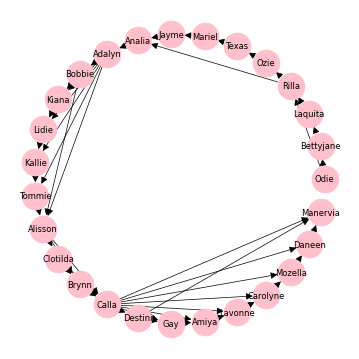


Causal context: A group of friends is planting a bed of flowers from seed, but the seed packets are not labeled. Odie will be happy if the flowers she planted are red. Bettyjane will be happy if the flowers she planted are pink and Odie is happy. Laquita will be happy if the flowers she planted are yellow and Bettyjane is happy. Rilla will be happy if the flowers she planted are purple or if Odie is happy or if Laquita is happy. Ozie will be happy if the flowers she planted are purple or if Rilla is happy. Texas will be happy if the flowers she planted are red and Ozie is happy. Mariel will be happy if the flowers she planted are yellow or if Texas is happy. Jayme will be happy if the flowers she planted are yellow and Mariel is happy. Analia will be happy if the flowers she planted are purple and Rilla is happy and Jayme is happy. Adalyn will be happy if the flowers she planted are yellow and Analia is happy. Bobbie will be happy if the flowers she planted are pink and Adalyn is happ

In [21]:
size = [4,6,2,7,4,9]
tg = FlowerGarden(n_per_bcc = size, 
                bcc_types = ["cycle"]*int(len(size)/2)+["wheel"]*int(len(size)/2))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
print("- Causal functions:", tg.causal_functions)

## Generate dataset

In [22]:
# x levels of graphical complexity (captured by BCC size).
# y tasks per graphical complexity level.
# z samples per task.
# = x*y*z subtasks.
graph_sizes = [[3,4,3], [4,5,4], [5,6,5]]
n_tasks_per_size = 3
n_samples_per_task = 1000
reps_per_sample = 5
bcc_type = "wheel"

df = dg.get_dataset(task_generator = FlowerGarden,
                    graph_sizes = graph_sizes, 
                    bcc_type = bcc_type,
                    n_tasks_per_size = n_tasks_per_size,
                    n_samples_per_task = n_samples_per_task,
                    reps_per_sample = reps_per_sample)

display(df)

,Task ID,Context ID,Sample ID,Nodes per BCC,Replicate ID,DAG adjacency matrix,DAG nodes,CCT adjacency matrix,CCT nodes,Exogenous variables,Bernoulli parameters,Global quantity,Local quantities,Compositions,Causal context,Sample context,Factual queries,Interventional queries (cause = True),Interventional queries (cause = False)
0,0.0.0,0,0,"[3, 4, 3]",0,"[[0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, ...","[Vivian, Margurite, Barbra, Ryleigh, Emerson, ...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Vivian, Barbra, Debra, Anahi]","[7U5Y, JEZ6, VBJ1, UI7R, 5AB1, UYB8, M79F, BX83]","[0.8, 0.8, 0.4, 0.7, 0.6, 0.4, 0.5, 0.4]","(Vivian, Anahi)","[(Vivian, Barbra), (Vivian, Debra), (Barbra, D...","[[(Vivian, Barbra), (Barbra, Debra), (Debra, A...",A group of friends is planting a bed of flower...,"Once the flowers bloom, Vivian's flowers are ...",{'Anahi': {'Prompt': 'Is Anahi happy? Begin yo...,"{('Vivian', 'Anahi'): {'Prompt': 'Now, suppose...","{('Vivian', 'Anahi'): {'Prompt': 'Now, suppose..."
1,0.0.1,0,0,"[3, 4, 3]",1,"[[0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, ...","[Vivian, Margurite, Barbra, Ryleigh, Emerson, ...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Vivian, Barbra, Debra, Anahi]","[7U5Y, JEZ6, VBJ1, UI7R, 5AB1, UYB8, M79F, BX83]","[0.8, 0.8, 0.4, 0.7, 0.6, 0.4, 0.5, 0.4]","(Vivian, Anahi)","[(Vivian, Barbra), (Vivian, Debra), (Barbra, D...","[[(Vivian, Barbra), (Barbra, Debra), (Debra, A...",A group of friends is planting a bed of flower...,"Once the flowers bloom, Vivian's flowers are ...",{'Anahi': {'Prompt': 'Is Anahi happy? Begin yo...,"{('Vivian', 'Anahi'): {'Prompt': 'Now, suppose...","{('Vivian', 'Anahi'): {'Prompt': 'Now, suppose..."
2,0.0.2,0,0,"[3, 4, 3]",2,"[[0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, ...","[Vivian, Margurite, Barbra, Ryleigh, Emerson, ...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Vivian, Barbra, Debra, Anahi]","[7U5Y, JEZ6, VBJ1, UI7R, 5AB1, UYB8, M79F, BX83]","[0.8, 0.8, 0.4, 0.7, 0.6, 0.4, 0.5, 0.4]","(Vivian, Anahi)","[(Vivian, Barbra), (Vivian, Debra), (Barbra, D...","[[(Vivian, Barbra), (Barbra, Debra), (Debra, A...",A group of friends is planting a bed of flower...,"Once the flowers bloom, Vivian's flowers are ...",{'Anahi': {'Prompt': 'Is Anahi happy? Begin yo...,"{('Vivian', 'Anahi'): {'Prompt': 'Now, suppose...","{('Vivian', 'Anahi'): {'Prompt': 'Now, suppose..."
3,0.0.3,0,0,"[3, 4, 3]",3,"[[0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, ...","[Vivian, Margurite, Barbra, Ryleigh, Emerson, ...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Vivian, Barbra, Debra, Anahi]","[7U5Y, JEZ6, VBJ1, UI7R, 5AB1, UYB8, M79F, BX83]","[0.8, 0.8, 0.4, 0.7, 0.6, 0.4, 0.5, 0.4]","(Vivian, Anahi)","[(Vivian, Barbra), (Vivian, Debra), (Barbra, D...","[[(Vivian, Barbra), (Barbra, Debra), (Debra, A...",A group of friends is planting a bed of flower...,"Once the flowers bloom, Vivian's flowers are ...",{'Anahi': {'Prompt': 'Is Anahi happy? Begin yo...,"{('Vivian', 'Anahi'): {'Prompt': 'Now, suppose...","{('Vivian', 'Anahi'): {'Prompt': 'Now, suppose..."
4,0.0.4,0,0,"[3, 4, 3]",4,"[[0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, ...","[Vivian, Margurite, Barbra, Ryleigh, Emerson, ...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Vivian, Barbra, Debra, Anahi]","[7U5Y, JEZ6, VBJ1, UI7R, 5AB1, UYB8, M79F, BX83]","[0.8, 0.8, 0.4, 0.7, 0.6, 0.4, 0.5, 0.4]","(Vivian, Anahi)","[(Vivian, Barbra), (Vivian, Debra), (Barbra, D...","[[(Vivian, Barbra), (Barbra, Debra), (Debra, A...",A group of friends is planting a bed of flower...,"Once the flowers bloom, Vivian's flowers are ...",{'Anahi': {'Prompt': 'Is Anahi happy? Begin yo...,"{('Vivian', 'Anahi'): {'Prompt': 'Now, suppose...","{('Vivian', 'Anahi'): {'Prompt': 'Now, suppose..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,8.999.0,8,999,"[5, 6, 5]",0,"[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...","[Danette, Lela, Darleen, Marcelle, Luz, Gerri,...","[[0, 1, 1, 1], [0, 0, 

In [23]:
# Process prompts.
df_factual, df_cf = dg.process_prompts()
display(df_factual)
display(df_cf)

,Task ID,Context ID,Sample ID,Replicate ID,Nodes per BCC,Effect,Context,Question,True
0,0.0.0,0,0,0,"[3, 4, 3]",Anahi,A group of friends is planting a bed of flower...,Is Anahi happy? Begin your response with Yes o...,1
1,0.0.0,0,0,0,"[3, 4, 3]",Barbra,A group of friends is planting a bed of flower...,Is Barbra happy? Begin your response with Yes ...,1
2,0.0.0,0,0,0,"[3, 4, 3]",Debra,A group of friends is planting a bed of flower...,Is Debra happy? Begin your response with Yes o...,1
3,0.0.1,0,0,1,"[3, 4, 3]",Anahi,A group of friends is planting a bed of flower...,Is Anahi happy? Begin your response with Yes o...,1
4,0.0.1,0,0,1,"[3, 4, 3]",Barbra,A group of friends is planting a bed of flower...,Is Barbra happy? Begin your response with Yes ...,1
...,...,...,...,...,...,...,...,...,...
134995,8.999.3,8,999,3,"[5, 6, 5]",Luz,A group of friends is planting a bed of flower...,Is Luz happy? Begin your response with Yes or ...,1
134996,8.999.3,8,999,3,"[5, 6, 5]",Moesha,A group of friends is planting a bed of flower...,Is Moesha happy? Begin your response with Yes ...,1
134997,8.999.4,8,999,4,"[5, 6, 5]",Ferne,A group of friends is planting a bed of flower...,Is Ferne happy? Begin your response with Yes o...,0
134998,8.999.4,8,999,4,"[5, 6, 5]",Luz,A group of friends is planting a bed of flower...,Is Luz happy? Begin your response with Yes or ...,1


,Task ID,Context ID,Sample ID,Replicate ID,Nodes per BCC,Cause-effect pair,Cause,Effect,Context,Question (cause = True),True (cause = True),Question (cause = False),True (cause = False)
0,0.0.0,0,0,0,"[3, 4, 3]","(Vivian, Anahi)",Vivian,Anahi,A group of friends is planting a bed of flower...,"Now, suppose that Vivian is happy regardless o...",1,"Now, suppose that Vivian is not happy regardle...",1
1,0.0.0,0,0,0,"[3, 4, 3]","(Vivian, Barbra)",Vivian,Barbra,A group of friends is planting a bed of flower...,"Now, suppose that Vivian is happy regardless o...",1,"Now, suppose that Vivian is not happy regardle...",1
2,0.0.0,0,0,0,"[3, 4, 3]","(Vivian, Debra)",Vivian,Debra,A group of friends is planting a bed of flower...,"Now, suppose that Vivian is happy regardless o...",1,"Now, suppose that Vivian is not happy regardle...",1
3,0.0.0,0,0,0,"[3, 4, 3]","(Barbra, Debra)",Barbra,Debra,A group of friends is planting a bed of flower...,"Now, suppose that Barbra is happy regardless o...",1,"Now, suppose that Barbra is not happy regardle...",0
4,0.0.0,0,0,0,"[3, 4, 3]","(Barbra, Anahi)",Barbra,Anahi,A group of friends is planting a bed of flower...,"Now, suppose that Barbra is happy regardless o...",1,"Now, suppose that Barbra is not happy regardle...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,8.999.4,8,999,4,"[5, 6, 5]","(Danette, Luz)",Danette,Luz,A group of friends is planting a bed of flower...,"Now, suppose that Danette is happy regardless ...",1,"Now, suppose that Danette is not happy regardl...",0
269996,8.999.4,8,999,4,"[5, 6, 5]","(Danette, Moesha)",Danette,Moesha,A group of friends is planting a bed of flower...,"Now, suppose that Danette is happy regardless ...",1,"Now, suppose that Danette is not happy regardl...",1
269997,8.999.4,8,999,4,"[5, 6, 5]","(Luz, Moesha)",Luz,Moesha,A group of friends is planting a bed of flower...,"Now, suppose that Luz is happy regardless of a...",1,"Now, suppose that Luz is not happy regardless ...",1
269998,8.999.4,8,999,4,"[5, 6, 5]","(Luz, Ferne)",Luz,Ferne,A group of friends is planting a bed of flower...,"Now, suppose that Luz is happy regardless of a...",0,"Now, suppose that Luz is not happy regardless ...",0


In [24]:
pns_dict = dg.get_pns_dict(verbose = True)
pns_dict

-- PNS = 0.087 | ATE = 0.08699999999999997 --
-- PNS = 0.581 | ATE = 0.581 --
-- PNS = 0.145 | ATE = 0.14500000000000002 --
-- PNS = 0.251 | ATE = 0.251 --
-- PNS = 0.151 | ATE = 0.15100000000000002 --
-- PNS = 0.602 | ATE = 0.602 --
-- PNS = 0.05 | ATE = 0.04999999999999993 --
-- PNS = 0.491 | ATE = 0.491 --
-- PNS = 0.259 | ATE = 0.259 --
-- PNS = 0.517 | ATE = 0.517 --
-- PNS = 0.103 | ATE = 0.10299999999999998 --
-- PNS = 0.209 | ATE = 0.20899999999999996 --
-- PNS = 0.04 | ATE = 0.040000000000000036 --
-- PNS = 0.485 | ATE = 0.485 --
-- PNS = 0.245 | ATE = 0.245 --
-- PNS = 0.514 | ATE = 0.514 --
-- PNS = 0.069 | ATE = 0.06899999999999995 --
-- PNS = 0.137 | ATE = 0.137 --
-- PNS = 0.006 | ATE = 0.006000000000000005 --
-- PNS = 0.034 | ATE = 0.03400000000000003 --
-- PNS = 0.013 | ATE = 0.013000000000000012 --
-- PNS = 0.387 | ATE = 0.387 --
-- PNS = 0.078 | ATE = 0.07799999999999996 --
-- PNS = 0.194 | ATE = 0.19399999999999995 --
-- PNS = 0.002 | ATE = 0.0020000000000000018 --
-

{0: {"('Vivian', 'Anahi')": 0.087,
  "('Vivian', 'Barbra')": 0.581,
  "('Vivian', 'Debra')": 0.145,
  "('Barbra', 'Debra')": 0.251,
  "('Barbra', 'Anahi')": 0.151,
  "('Debra', 'Anahi')": 0.602,
  "[('Vivian', 'Barbra'), ('Barbra', 'Debra'), ('Debra', 'Anahi')]": 0.087790262,
  "[('Vivian', 'Barbra'), ('Barbra', 'Anahi')]": 0.08773099999999999,
  "[('Vivian', 'Debra'), ('Debra', 'Anahi')]": 0.08728999999999999},
 1: {"('Kassandra', 'Kaelyn')": 0.05,
  "('Kassandra', 'Isabell')": 0.491,
  "('Kassandra', 'Crystal')": 0.259,
  "('Isabell', 'Crystal')": 0.517,
  "('Isabell', 'Kaelyn')": 0.103,
  "('Crystal', 'Kaelyn')": 0.209,
  "[('Kassandra', 'Isabell'), ('Isabell', 'Crystal'), ('Crystal', 'Kaelyn')]": 0.053054023,
  "[('Kassandra', 'Isabell'), ('Isabell', 'Kaelyn')]": 0.05057299999999999,
  "[('Kassandra', 'Crystal'), ('Crystal', 'Kaelyn')]": 0.054131},
 2: {"('Anner', 'Arra')": 0.04,
  "('Anner', 'Dona')": 0.485,
  "('Anner', 'Joyce')": 0.245,
  "('Dona', 'Joyce')": 0.514,
  "('Dona', 

In [25]:
threshold_dict = dg.get_internal_consistency_thresholds(multiplier = 1.1)
threshold_dict

{0: {"[('Vivian', 'Barbra'), ('Barbra', 'Debra'), ('Debra', 'Anahi')]": 0.009991818390804597,
  "[('Vivian', 'Barbra'), ('Barbra', 'Anahi')]": 0.009242528735632128,
  "[('Vivian', 'Debra'), ('Debra', 'Anahi')]": 0.0036666666666666497},
 1: {"[('Kassandra', 'Isabell'), ('Isabell', 'Crystal'), ('Crystal', 'Kaelyn')]": 0.06718850599999991,
  "[('Kassandra', 'Isabell'), ('Isabell', 'Kaelyn')]": 0.012605999999999786,
  "[('Kassandra', 'Crystal'), ('Crystal', 'Kaelyn')]": 0.09088199999999992},
 2: {"[('Anner', 'Dona'), ('Dona', 'Joyce'), ('Joyce', 'Arra')]": 0.16079992499999987,
  "[('Anner', 'Dona'), ('Dona', 'Arra')]": 0.17971249999999997,
  "[('Anner', 'Joyce'), ('Joyce', 'Arra')]": 0.1769624999999999},
 3: {"[('Lynn', 'Karolyn'), ('Karolyn', 'Elzada'), ('Elzada', 'Leanne')]": 0.6320138000000001,
  "[('Lynn', 'Karolyn'), ('Karolyn', 'Leanne')]": 0.6138,
  "[('Lynn', 'Elzada'), ('Elzada', 'Leanne')]": 0.6376333333333334},
 4: {"[('Josefina', 'Kia'), ('Kia', 'Aggie'), ('Aggie', 'Katie')]": 

In [26]:
df_cf[df_cf["Context ID"] == 0]

,Task ID,Context ID,Sample ID,Replicate ID,Nodes per BCC,Cause-effect pair,Cause,Effect,Context,Question (cause = True),True (cause = True),Question (cause = False),True (cause = False)
0,0.0.0,0,0,0,"[3, 4, 3]","(Vivian, Anahi)",Vivian,Anahi,A group of friends is planting a bed of flower...,"Now, suppose that Vivian is happy regardless o...",1,"Now, suppose that Vivian is not happy regardle...",1
1,0.0.0,0,0,0,"[3, 4, 3]","(Vivian, Barbra)",Vivian,Barbra,A group of friends is planting a bed of flower...,"Now, suppose that Vivian is happy regardless o...",1,"Now, suppose that Vivian is not happy regardle...",1
2,0.0.0,0,0,0,"[3, 4, 3]","(Vivian, Debra)",Vivian,Debra,A group of friends is planting a bed of flower...,"Now, suppose that Vivian is happy regardless o...",1,"Now, suppose that Vivian is not happy regardle...",1
3,0.0.0,0,0,0,"[3, 4, 3]","(Barbra, Debra)",Barbra,Debra,A group of friends is planting a bed of flower...,"Now, suppose that Barbra is happy regardless o...",1,"Now, suppose that Barbra is not happy regardle...",0
4,0.0.0,0,0,0,"[3, 4, 3]","(Barbra, Anahi)",Barbra,Anahi,A group of friends is planting a bed of flower...,"Now, suppose that Barbra is happy regardless o...",1,"Now, suppose that Barbra is not happy regardle...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.999.4,0,999,4,"[3, 4, 3]","(Vivian, Barbra)",Vivian,Barbra,A group of friends is planting a bed of flower...,"Now, suppose that Vivian is happy regardless o...",1,"Now, suppose that Vivian is not happy regardle...",1
29996,0.999.4,0,999,4,"[3, 4, 3]","(Vivian, Debra)",Vivian,Debra,A group of friends is planting a bed of flower...,"Now, suppose that Vivian is happy regardless o...",1,"Now, suppose that Vivian is not happy regardle...",1
29997,0.999.4,0,999,4,"[3, 4, 3]","(Barbra, Debra)",Barbra,Debra,A group of friends is planting a bed of flower...,"Now, suppose that Barbra is happy regardless o...",1,"Now, suppose that Barbra is not happy regardle...",1
29998,0.999.4,0,999,4,"[3, 4, 3]","(Barbra, Anahi)",Barbra,Anahi,A group of friends is planting a bed of flower...,"Now, suppose that Barbra is happy regardless o...",1,"Now, suppose that Barbra is not happy regardle...",1


## End of document